Model of Neural System

Computer Practical 7

Bramantyo Ibrahim Supriyatno

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Hodgkin-Huxley model of action potential generation

In [2]:
def alpha_n(v):
    # v in mV
    alpha_ms =  0.01 * (v  + 55) / (1 - np.exp(-0.1 * (v + 55)))
    return alpha_ms

In [3]:
def beta_n(v):
    # v in mV
    beta_ms = 0.125 * np.exp(-0.0125*(v + 65))
    return beta_ms

In [4]:
def alpha_m(v):
    return 0.1 * (v+40) / (1-np.exp(-0.1*(v + 40)))

In [5]:
def beta_m(v):
    return 4 * np.exp(-0.0556*(v+65))

In [6]:
def alpha_h(v):
    return 0.07 * np.exp(-0.05 * (v + 65))

In [7]:
def beta_h(v):
    return 1 / (1 + np.exp(-0.1 * (v+35)))

In [51]:
def first_order_kinetic(a_func, b_func, v, x):
    return a_func(v)*(1.-x) - b_func(v)*x    

In [52]:
def sodium_current(v, m, h, e_na=50, conductance=120e-9):
    return conductance*np.power(m,3)*h*(v - e_na) #in mA

In [53]:
def potassium_current(v, n, e_k=-77, conductance=36e-9):#v in mV
    return conductance * np.power(n,4) * (v - e_k) #in mA

In [54]:
def leak_current(v, e_leak=-54.387, conductance=0.3e-9):
    return conductance*(v - e_leak)

In [55]:
def hodgkin_huxley_model(v, i_na, i_k, i_leak, i_e, cm):
    return (-i_na - i_k - i_leak + i_e) / cm    

In [65]:
def hh_euler(params, init_values, t, dt):
    v_res = np.zeros((t.shape[0]+1))
    ms = np.zeros_like(v_res)
    hs = np.zeros_like(v_res)
    ns = np.zeros_like(v_res)    
    i_nas = np.zeros_like(v_res) 
    i_ks = np.zeros_like(v_res)
    i_leaks = np.zeros_like(v_res)
    ie = np.zeros_like(v_res)
    
    v_res[0] = init_values['v']
    ms[0] = init_values['m']
    hs[0] = init_values['h']
    ns[0] = init_values['n']    
    
    if params['is_i_time_dependent']:        
        idx_triggered = t>params['t_trigger']
        ie[idx_triggered] = params['ie']
        ie[~idx_triggered] = params['ie_pt']         
    else:
        ie.fill(params['ie'])
    
    for i in range(1, v_res.shape[0]): 
        ns[i] = ns[i-1] + dt *  first_order_kinetic(alpha_n, beta_n, v_res[i], ns[i-1])
        ms[i] = ms[i-1] + dt *  first_order_kinetic(alpha_m, beta_m, v_res[i], ms[i-1])
        hs[i] = hs[i-1] + dt *  first_order_kinetic(alpha_h, beta_h, v_res[i], hs[i-1])
        
        i_nas[i] = sodium_current(v_res[i-1], ms[i-1], hs[i-1])
        i_ks[i] = potassium_current(v_res[i-1], ns[i-1])
        i_leaks[i] = leak_current(v_res[i-1]) 
        
        v_res[i] = v_res[i-1] + dt * hodgkin_huxley_model(v_res[i-1], i_nas[i], i_ks[i], i_leaks[i], ie[i], params['cm'])
        #v_res[i] = v_res[i-1]
    return v_res[1:], i_leaks[1:], i_ks[1:], i_nas[1:], hs[1:], ms[1:], ns[1:]

In [66]:
init_values = {}
init_values['v'] = -65
init_values['m'] = 0.0529
init_values['h'] = 0.5961
init_values['n'] = 0.3177

params = {}
params['is_i_time_dependent'] = False
params['ie'] = 0
params['cm'] = 1e-12

del_t = 1e-4
t = np.arange(0, 10, step=del_t)
ret = hh_euler(params, init_values, t, del_t)

<ipython-input-55-8f209f470a17>:2: RuntimeWarning: overflow encountered in double_scalars
  return (-i_na - i_k - i_leak + i_e) / cm
<ipython-input-65-ec44e4c8a70f>:32: RuntimeWarning: invalid value encountered in double_scalars
  v_res[i] = v_res[i-1] + dt * hodgkin_huxley_model(v_res[i-1], i_nas[i], i_ks[i], i_leaks[i], ie[i], params['cm'])


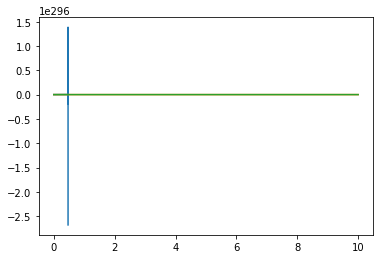

In [67]:
plt.plot(t,ret[3], label='h')
plt.plot(t,ret[4], label='m')
plt.plot(t,ret[5], label='s')

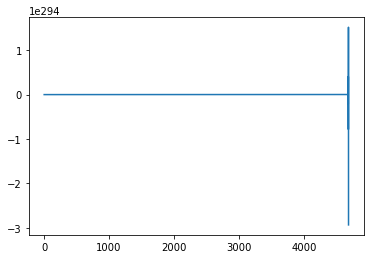

In [69]:
plt.plot(ret[1], label='h')
#plt.plot(ret[2], label='h')